# Algoritmo Genético Básico

In [1]:
import import_ipynb
from algoritmos import *

importing Jupyter notebook from algoritmos.ipynb


## Generación de semillas aleatorias

In [2]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoBasico

Fichero: ch130


NameError: name 'elite' is not defined

<Figure size 864x864 with 0 Axes>

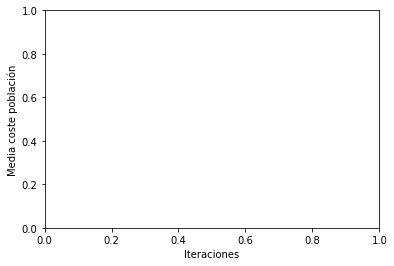

In [3]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')

semilla = random.randint(0,9999999)
algoritmo = "geneticoBasico"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = 130    # Fichero
tam_poblacion = 100 # 30-100 individuos
k_torneo = round(0.15 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios
tam_cruce = round(num_nodos / 2) # Num nodos a mantener del padre1
prob_mutacion = 0.25 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.1) # Tamaño (num nodos) sublista a mutar 
tam_elite = 2 # Número de soluciones élite a mantener
sembrar_greedy = True

t = time.time()
with Pool(processes=10) as p:
     resultados = p.starmap(genetico_basico, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [tam_elite], [sembrar_greedy], [fig], [ax]))

#resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, tam_elite, sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

poblacion = resultados[0]
mejorIndividuo = min(poblacion.individuos)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (coste, resultados[1], semilla) ) 
print("-----\nCoste Media:\t%f" % poblacion.media)

titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)

In [1]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=(12,12))  
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')

semilla = random.randint(0,9999999)
algoritmo = "geneticoBasico"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = 130    # Fichero
tam_poblacion = 50 # 30-100 individuos
k_torneo = round(0.1 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios
tam_cruce = round(num_nodos / 2) # Num nodos a mantener del padre1
prob_mutacion = 0.1 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.1) # Tamaño (num nodos) sublista a mutar 
tam_elite = 3 # Número de soluciones élite a mantener

t = time.time()
# with Pool(processes=10) as p:
#     resultados = p.starmap(genetico_basico, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [tam_elite], [fig], [ax]))

resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, tam_elite, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

poblacion = resultados[0]
mejorIndividuo = min(poblacion.individuos)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (coste, resultados[1], semilla) ) 
print("-----\nCoste Media:\t%f" % poblacion.media)

titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)

NameError: name 'plt' is not defined